# Pymaceuticals Inc.
---

### Analysis


1.	The box plot of the final tumor volume of each mouse across the four regimens* of interest is showing us that Capomulin and Ramican are better treatments than Infubinal and Ceftamin, because the final tumor sizes are smaller. However, this statement is true only if the initial tumor sizes were similar across all the treatments. This is something that we did not check in our assignments. A better dataset would be to have the percentage change of the tumor volume for each drug, instead of using the absolute volume size.

    *The four regimens -- Capomulin, Ramicane, Infubinol and Ceftamin
    

2.	The line plot of the tumor volume over time for the mouse treated with Capomulin drug (I checked a few more than the l509 asked in the exercise) clearly states that the treatment is efficient at reducing the tumor size. We see a downward slope line on the graph, which means the tumor gets smaller over time.


3.	The scatter plot of average tumor volume versus mouse weight for the Capomulin regimen shows positive correlation between these datasets (dots on the scatter chart are distributed between the bottom left corner to the top right corner). Calculated correlation is 0.84, which is a confirmation of a strong positive correlation. This basically means that heavier mice tend to have bigger tumors than lighter ones.


In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
Combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice.
# Using .nunique() function to count unique number of mice.
Mice_count = Combined_df['Mouse ID'].nunique()
Mice_count

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicated = Combined_df.loc[Combined_df.duplicated(keep = False, subset=['Mouse ID','Timepoint']), :]
Duplicated_Mice = Duplicated['Mouse ID'].unique()
Duplicated_Mice

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicated = Combined_df.loc[Combined_df['Mouse ID'] == Duplicated_Mice[0], :]
Duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_df = Combined_df.drop(Combined_df[Combined_df['Mouse ID'] == 'g989'].index)
Cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice in the clean DataFrame.
Number_of_Mice = Cleaned_df['Mouse ID'].nunique()
Number_of_Mice

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Grouped_by_Drugs = Cleaned_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean = Grouped_by_Drugs.mean()
Median = Grouped_by_Drugs['Tumor Volume (mm3)'].median()
Variance = Grouped_by_Drugs['Tumor Volume (mm3)'].var()
Standard_Deviation = Grouped_by_Drugs['Tumor Volume (mm3)'].std()
SEM = Grouped_by_Drugs['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
Summary_Statistics_df = pd.DataFrame(Mean)     
Summary_Statistics_df = Summary_Statistics_df.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})     #renamed my first column
Summary_Statistics_df['Median Tumor Volume'] = Median
Summary_Statistics_df['Tumor Volume Variance'] = Variance
Summary_Statistics_df['Tumor Volume Std. Dev.'] = Standard_Deviation
Summary_Statistics_df['Tumor Volume Std. Err.'] = SEM
Summary_Statistics_df

,Timepoint,Mean Tumor Volume,Metastatic Sites,Age_months,Weight (g),Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,,,,,
Capomulin,21.565217,40.675741,0.713043,13.456522,19.965217,41.557809,24.947764,4.994774,0.329346
Ceftamin,19.747191,52.591172,1.179775,13.247191,27.398876,51.776157,39.290177,6.268188,0.469821
Infubinol,18.174157,52.884795,0.960674,16.230337,27.196629,51.820584,43.128684,6.567243,0.492236
Ketapril,19.707447,55.235638,1.297872,15.659574,27.861702,53.698743,68.553577,8.279709,0.603860
Naftisol,19.623656,54.331565,1.182796,12.000000,27.166667,52.509285,66.173479,8.134708,0.596466
Placebo,18.674033,54.033581,1.441989,10.734807,27.928177,52.288934,61.168083,7.821003,0.581331
Propriva,17.060811,52.320930,1.013514,10.006757,27.135135,50.446266,43.852013,6.622085,0.544332
Ramicane,21.425439,40.216745,0.548246,10.684211,19.679825,40.673236,23.486704,4.846308,0.320955
Stelasyn,19.226519,54.233149,0.872928,12.784530,27.856354,52.431737,59.450562,7.710419,0.573111


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Statistics_by_Aggregation = Cleaned_df.groupby('Drug Regimen').agg(['mean', 'median','var','std','sem'])['Tumor Volume (mm3)']
Statistics_by_Aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

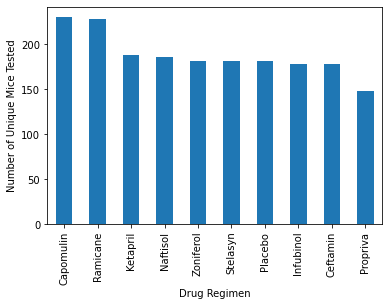

In [31]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Using the 'Grouped_by_Drugs'
# Count how many times each Mouse appears in our group
Each_Mouse_Count = Grouped_by_Drugs['Mouse ID'].count()
Each_Mouse_Count = Each_Mouse_Count.sort_values(ascending=False)

# Making the chart
Chart = Each_Mouse_Count.plot(kind='bar')
Chart.set_ylabel('Number of Unique Mice Tested')
plt.show()

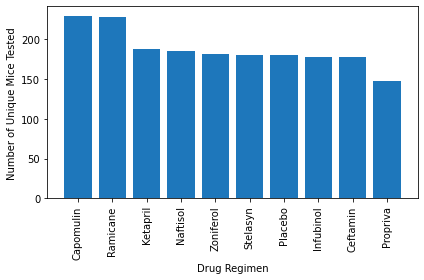

In [32]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
y_axis = Each_Mouse_Count     #mice count
x_axis = Each_Mouse_Count.index     #med's list

#Creating Bar Chart
plt.bar(x_axis, y_axis, color='#1E77BB', align='center')
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')

plt.tight_layout()
plt.show()

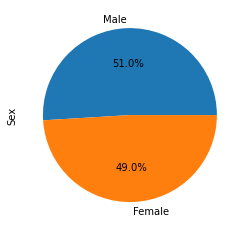

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Grouped_by_Sex = Cleaned_df.groupby('Sex')
Mouse_by_Sex = Grouped_by_Sex['Sex'].count()
Mouse_by_Sex = Mouse_by_Sex.sort_values(ascending=False)

Pie_Chart = Mouse_by_Sex.plot(kind='pie', autopct="%1.1f%%")
plt.show()

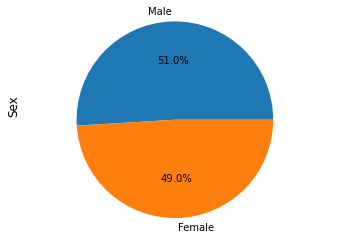

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
sizes = Mouse_by_Sex

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Sex', loc='left', rotation='vertical', y=0.5)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Mice_and_Timepoint_df = Cleaned_df[['Mouse ID', 'Timepoint']]
Mice_and_Timepoint_df = Mice_and_Timepoint_df.sort_values('Timepoint', ascending=False)
Max_Results = Mice_and_Timepoint_df.drop_duplicates('Mouse ID', keep='first')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Merged_Max_Results_with_Cleaned_df = pd.merge(Max_Results, Cleaned_df, on = ['Mouse ID','Timepoint'], how ='left')

In [36]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Drug_Treat =  Merged_Max_Results_with_Cleaned_df.loc[ Merged_Max_Results_with_Cleaned_df['Drug Regimen'] == drug]
    Tumor_Vol = Drug_Treat['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(Tumor_Vol)
    
    # Determine outliers using upper and lower bounds
    
    # Finding Q1 and Q3 values first
    Q1, Q3 = np.percentile(sorted(Tumor_Vol), [25, 75])
    IQR = Q3 - Q1

    Lower_Bound = Q1 - (IQR * 1.5)
    Upper_Bound = Q3 + (IQR * 1.5)
    Outlier = [x for x in Tumor_Vol if x <= Lower_Bound or x >= Upper_Bound]
    
    print(f'{drug}s outlier is : {Outlier}')


Capomulins outlier is : []
Ramicanes outlier is : []
Infubinols outlier is : [36.321345799999996]
Ceftamins outlier is : []


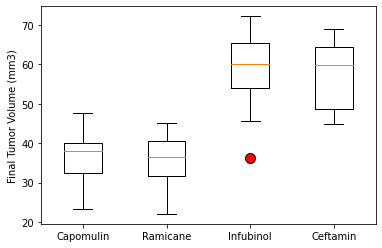

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
flierprops = dict(markerfacecolor='r', markersize=10)

plt.boxplot(tumor_vol_list, labels=labels, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

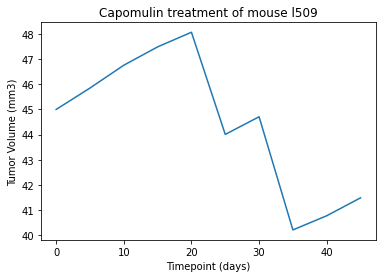

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Mouse_ID = 'l509'     #I assigned this variable in case I want to look up other mice by their IDs, that way my Title and chart will adjust automatically 

TumorVol_vs_Timepoint_df = Cleaned_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
Specific_Mouse_df = TumorVol_vs_Timepoint_df.loc[TumorVol_vs_Timepoint_df['Mouse ID'] == Mouse_ID, :]

Specific_Mouse_df.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line', legend=False)

plt.title("Capomulin treatment of mouse " + Mouse_ID)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

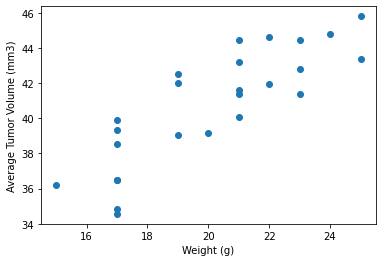

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Drug_Name = 'Capomulin'     #I assigned this variable in case I want to look up by other Drug Name, that way my chart will adjust 
Avg_Tumor_MouseWheight = Cleaned_df[['Mouse ID','Tumor Volume (mm3)','Drug Regimen','Weight (g)']]

Specific_Drug = Avg_Tumor_MouseWheight.loc[Avg_Tumor_MouseWheight['Drug Regimen'] == Drug_Name, :]
Average = Specific_Drug.groupby(['Mouse ID']).mean()

plt.scatter(Average['Weight (g)'], Average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


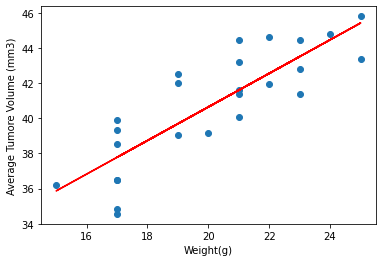

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Compute the Pearson correlation coefficient between mouse weight and average tumor volume
x_values = Average['Weight (g)']
y_values = Average['Tumor Volume (mm3)']
correlation = sts.pearsonr(x_values,y_values)

# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")

plt.show()